# Import Modules
- Std libraries such as pandas, numpy, and sklearn plus seaborn for plotting purposes

In [20]:
# Std libraries for data analysis
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Std libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Misc
import os
import warnings
warnings.filterwarnings('ignore')

# Read In Data For Analysis
Now opening the data from our xls file for exploration and data analysis using the panda library

In [43]:
df = pd.read_excel('default of credit card clients.xls')
df.columns = df.iloc[0]
df = df.drop(df.index[0])
# Ensure that the data has correctly been loaded
df.head()
df.shape

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploratory Data Analysis
- Check the shape of the dataset
- Check for missing values or outliers
- Verify the data types for each column
- Explore the relationship between our categorical variables limit_bal, sex, education, marriage, and age

In [31]:
# Check for missing values and or missing data
df.isnull().sum()
df.isna().sum()

# Convert columns 6 to 23 starting from age to pay_amt6 to numeric
for i in range(6, 24):
    df.iloc[:, i] = pd.to_numeric(df.iloc[:, i], errors='coerce')

# Convert columns 1 to 5 starting from ID to education to categorical
for i in range(2, 6):
    df.iloc[:, i] = df.iloc[:, i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

<AxesSubplot:xlabel='AGE', ylabel='Density'>

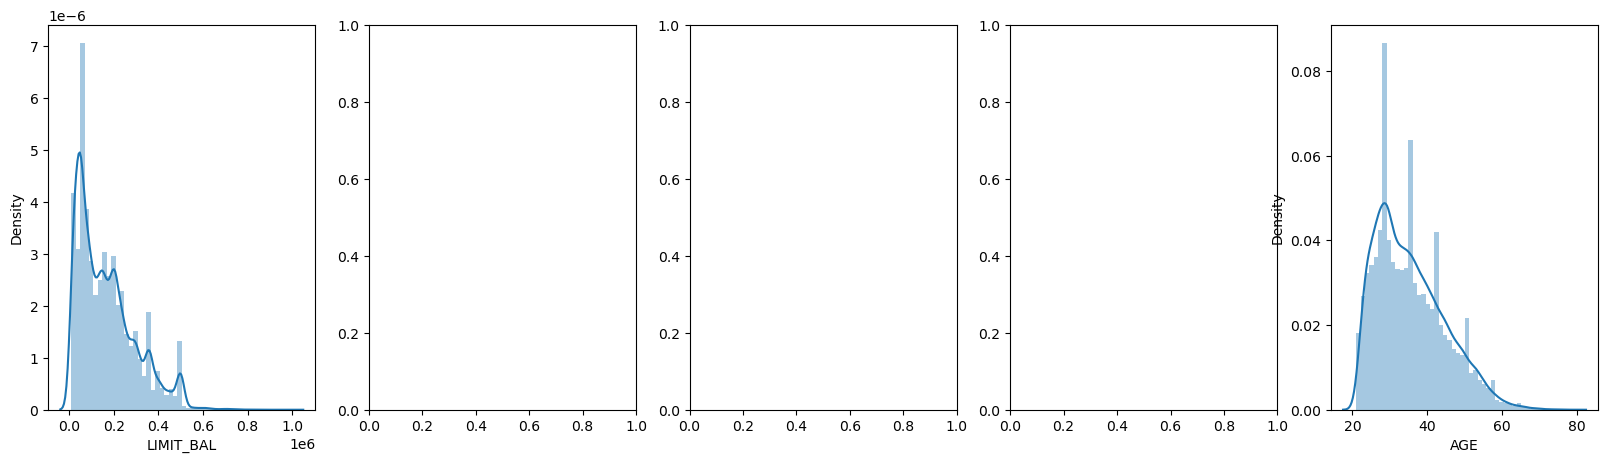

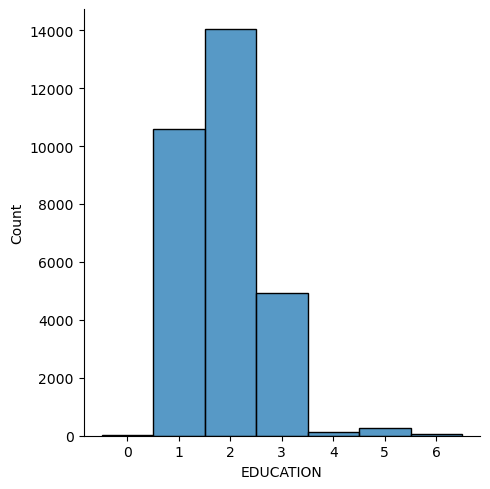

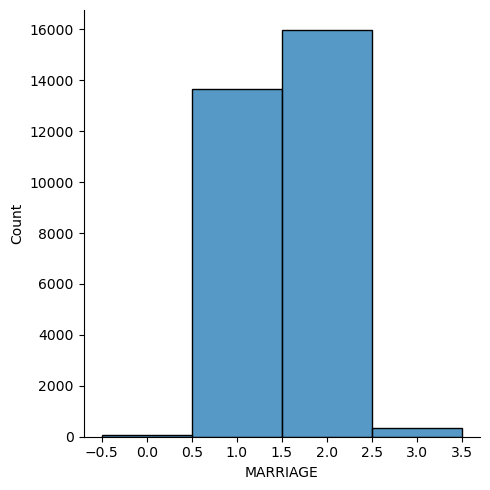

In [38]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
sns.distplot(df['LIMIT_BAL'], ax=ax[0])
sns.displot(df['EDUCATION'], ax=ax[2])
sns.displot(df['MARRIAGE'], ax=ax[3])
sns.distplot(df['AGE'], ax=ax[4])

# Which variable is most important in predicting the default of a credit card client?
- Use the Random Forest Classifier to determine the most important variable in predicting the default of a credit card client

In [47]:
# Train the model using random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into train and test
X = df.drop(['ID', 'default payment next month'], axis=1)
y = df['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

In [51]:
# Encode the categorical variables
le = LabelEncoder()

for i in range(2, 6):
    X_train.iloc[:, i] = le.fit_transform(X_train.iloc[:, i])
    X_test.iloc[:, i] = le.fit_transform(X_test.iloc[:, i])

# Train the model
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

# Predict the model
y_pred = rf.predict(X_test)

ValueError: Unknown label type: 'unknown'